In [1]:
## In this project, I will only do basic visualisation for forbes billionaires ranking

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## Loading data from my drive, source from Kaggle
data = (r"C:\Users\user\Desktop\Kaggle\forbes_billionaires_geo.csv")
df = pd.read_csv(data)

In [4]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)


In [5]:
## Checklist
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("_" * 20)
print("Missing value:", df.isnull().sum())
print("Duplicated value:", df.duplicated().any())

Number of rows: 2755
Number of columns: 13
____________________
Missing value: Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
geometry          0
dtype: int64
Duplicated value: False


In [6]:
## No duplicated value but missing values. I would make this row into 1000 to make this analysis to world top 1000 people
df1 = df.head(1000)
df1.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)


In [7]:
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])
print("_" * 20)
print("Missing value:", df1.isnull().sum())
print("Duplicated value:", df1.duplicated().any())

Number of rows: 1000
Number of columns: 13
____________________
Missing value: Name             0
NetWorth         0
Country          0
Source           0
Rank             0
Age             45
Residence       10
Citizenship      3
Status         166
Children       350
Education      376
Self_made        5
geometry         0
dtype: int64
Duplicated value: False


In [8]:
## Drop the two uncessarily columns in my analysis
df1.drop(["Self_made", "geometry"], axis = 1, inplace = True)
df1.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University"
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy..."
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ..."
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University"
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University"


In [9]:
## As this dataframe is sorted by ranking, I will set index as rank
df1 = df1.set_index("Rank")

In [10]:
df1.head()

,Name,NetWorth,Country,Source,Age,Residence,Citizenship,Status,Children,Education
Rank,,,,,,,,,,
1,Jeff Bezos,177.0,United States,Amazon,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University"
2,Elon Musk,151.0,United States,"Tesla, SpaceX",49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy..."
3,Bernard Arnault & family,150.0,France,LVMH,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ..."
4,Bill Gates,124.0,United States,Microsoft,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University"
5,Mark Zuckerberg,97.0,United States,Facebook,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University"


In [11]:
## First, visualise the data group by country and see which country has the highest percentage of top richest people



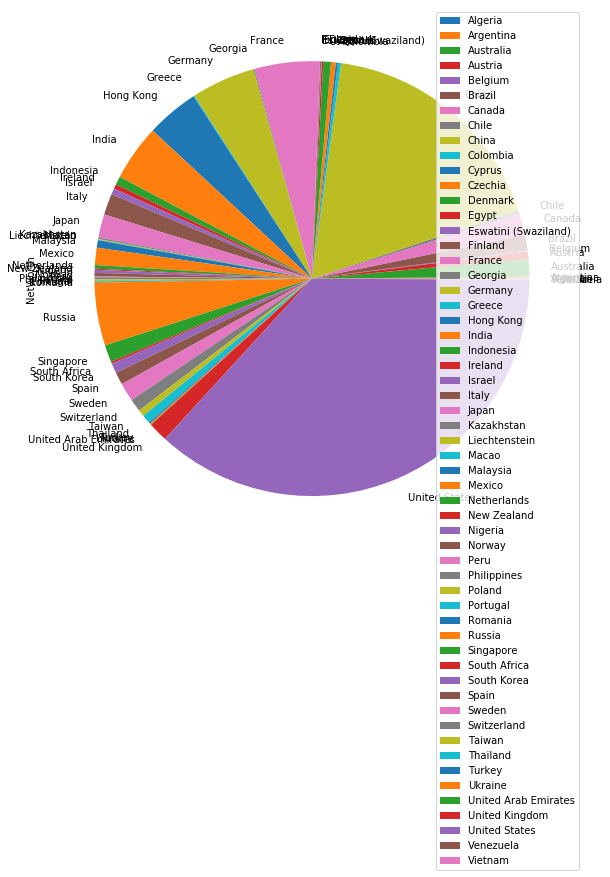

In [12]:
df1.groupby(["Country"]).sum().plot(kind='pie', y='NetWorth', figsize=(30,10))

In [13]:
df1["Country"].value_counts().to_frame()

,Country
United States,321
China,182
Germany,56
Russia,46
India,40
Hong Kong,40
France,26
Italy,21
Canada,20
United Kingdom,20


In [14]:
## As there is too many country with low frequency, I want to make the graph shows only 10 countries
## Since the lightest shipment is 1.01KG, I will categorized them into 7 category
def country1(df1):
    if df1["Country"] == "United States":
        return "United States"
    elif df1["Country"] == "China":
        return "China"
    elif df1["Country"] == "Germany":
        return "Germany"
    elif df1["Country"] == "Russia":
        return "Russia"
    elif df1["Country"] == "Hong Kong":
        return "Hong Kong"
    elif df1["Country"] == "India":
        return "India"
    elif df1["Country"] == "France":
        return "France"
    elif df1["Country"] == "Italy":
        return "Italy"
    elif df1["Country"] == "Canada":
        return "Canada"
    elif df1["Country"] == "United Kingdom":
        return "United Kingdom"
    else:
        return "Others"

In [15]:
df1["country1"] = df1.apply(country1, axis = 1)

In [16]:
df1.head()

,Name,NetWorth,Country,Source,Age,Residence,Citizenship,Status,Children,Education,country1
Rank,,,,,,,,,,,
1,Jeff Bezos,177.0,United States,Amazon,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",United States
2,Elon Musk,151.0,United States,"Tesla, SpaceX",49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",United States
3,Bernard Arnault & family,150.0,France,LVMH,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",France
4,Bill Gates,124.0,United States,Microsoft,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",United States
5,Mark Zuckerberg,97.0,United States,Facebook,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",United States


In [17]:
## Now I have the country1 columns with only top10 country and other country labelled as "Others"
## Now I have to try if the columns worked correctly

df1["country1"].value_counts().to_frame()

,country1
United States,321
Others,228
China,182
Germany,56
Russia,46
India,40
Hong Kong,40
France,26
Italy,21
United Kingdom,20


In [25]:
df2 = df1["country1"].value_counts().to_frame()
df2

,country1
United States,321
Others,228
China,182
Germany,56
Russia,46
India,40
Hong Kong,40
France,26
Italy,21
United Kingdom,20


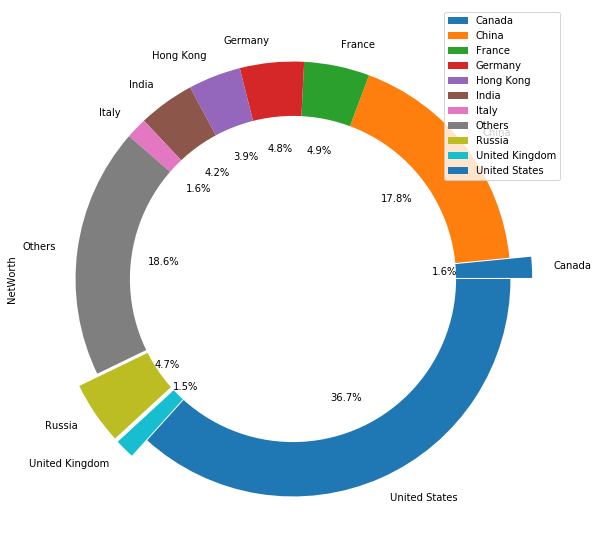

In [30]:
## Now plot again and replace country by country1
explode_list = [0.1, 0, 0, 0, 0.0, 0, 0, 0, 0.1, 0.1, 0.0]
df1.groupby(["country1"]).sum().plot(kind='pie', y='NetWorth', figsize=(30,10), autopct="%1.1f%%",explode=explode_list)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


In [31]:
## Alright, this pie chart clearly shows that the top10 country with the most billionaire listed in top1000 forbes

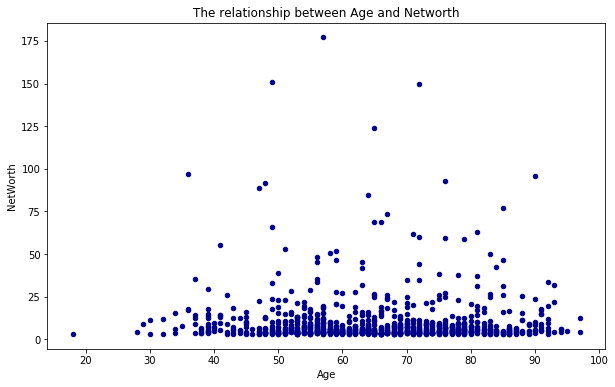

In [36]:
## Let's see if ["Age"] has a relationship with ["NetWorth"] with scatter plot

df1.plot(kind='scatter', x='Age', y='NetWorth', figsize=(10, 6), color='darkblue')

plt.title('The relationship between Age and Networth')
plt.xlabel('Age')
plt.ylabel('NetWorth')

plt.show()

In [37]:
## Nah, there is no relationship between age and relationship

In [94]:
df1["Status"].value_counts().to_frame()

,Status
Married,670
Divorced,66
Widowed,49
Single,29
In Relationship,13
"Widowed, Remarried",5
Separated,1
Engaged,1


In [95]:
df1["Status"].isnull().sum()

0

In [96]:
## As df1 is not clean on the ["Status"] columns, I will drop the null rows for a better result
## Before drop, I will save as a temp df

df2 = df1.dropna(subset = ["Status"])
df2.shape

(834, 11)

In [97]:
df2.isnull().sum()

Name             0
NetWorth         0
Country          0
Source           0
Age             14
Residence        1
Citizenship      0
Status           0
Children       189
Education      270
country1         0
dtype: int64

In [98]:
## The status columns is not clean but I want to reduce the option
df2["Status"].value_counts().to_frame()

,Status
Married,670
Divorced,66
Widowed,49
Single,29
In Relationship,13
"Widowed, Remarried",5
Separated,1
Engaged,1


In [99]:
def status(df2):
    if df2["Status"] == "Widowed, Remarried":
        return "Married"
    elif df2["Status"] == "Separated":
        return "Married"
    elif df2["Status"] == "Widowed":
        return "Divorced" 
    elif df2["Status"] == "Engaged":
        return "Married"    
    else:
        return df2["Status"]

In [100]:
df2["Status"] = df2.apply(status, axis = 1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
df2["Status"].value_counts().to_frame()

,Status
Married,677
Divorced,115
Single,29
In Relationship,13


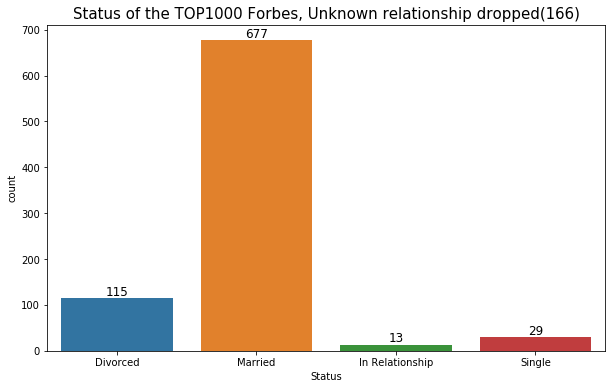

In [102]:
## Plot the status now
plt.figure(figsize = (10, 6))
sns.countplot( x = "Status", data = df2)

## Get current axis on current figure
ax = plt.gca()

##The maximum scale of y-axis
y_max = df["Status"].value_counts().max()

##Iterate through the list of axes "patches"
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() /2., p.get_height(), '%d' % int(p.get_height()),
           fontsize = 12, color = "black", ha = "center", va = "bottom")

## Shows the result here and the size
plt.title("Status of the TOP1000 Forbes, Unknown relationship dropped(166)", size = "15")
plt.show()

In [122]:
df3 = df1.dropna(subset = ["Education"])
df3.shape

(624, 11)

In [123]:
## Try and see how many billionaires are dropped out of school in the TOP1000
sub = "Drop Out"
df3["Drop_Out"] = df3["Education"].str.find(sub)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


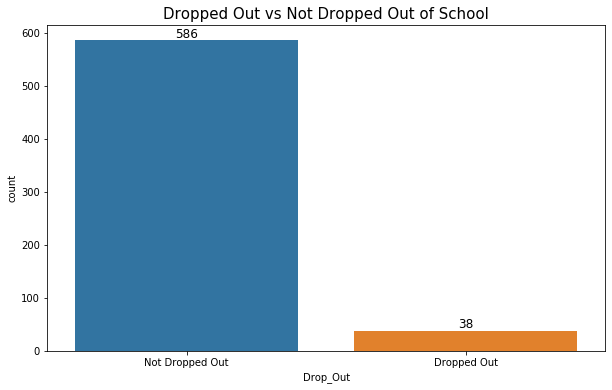

In [145]:
## Plot the status now
plt.figure(figsize = (10, 6))
sns.countplot( x = "Drop_Out", data = df3)

## Get current axis on current figure
ax = plt.gca()

##The maximum scale of y-axis
y_max = df3["Drop_Out"].value_counts().max()

##Iterate through the list of axes "patches"
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() /2., p.get_height(), '%d' % int(p.get_height()),
           fontsize = 12, color = "black", ha = "center", va = "bottom")

## Shows the result here and the size
plt.title("Dropped Out vs Not Dropped Out of School", size = "15")
plt.show()

In [125]:
df3[df3["Drop_Out"] == 46]

,Name,NetWorth,Country,Source,Age,Residence,Citizenship,Status,Children,Education,country1,Drop_Out
Rank,,,,,,,,,,,,
14,Steve Ballmer,68.7,United States,Microsoft,65.0,"Hunts Point, Washington",United States,Married,3.0,"Bachelor of Arts/Science, Harvard University; ...",United States,46


In [126]:
df3[df3["Drop_Out"] == 51]

,Name,NetWorth,Country,Source,Age,Residence,Citizenship,Status,Children,Education,country1,Drop_Out
Rank,,,,,,,,,,,,
589,Yuri Milner,4.8,Israel,tech investments,59.0,"Los Altos, California",Israel,Married,3.0,"Bachelor of Arts/Science, Moscow State Univers...",Others,51


In [127]:
## Now I figure out 46 means the Drop Out is found on Education columns 46th word and 51 means 51th word on that rows
## So I can conclude both 46 and 51 in to 0
## 0 Means that the first word and -1 means not found 

def dropout(df3):
    if df3["Drop_Out"] == 46:
        return "0"
    elif df3["Drop_Out"] == 51:
        return "0"  
    else:
        return df3["Drop_Out"]

In [128]:
df3["Drop_Out"] = df3.apply(dropout, axis = 1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
df3["Drop_Out"].value_counts().to_frame()

,Drop_Out
-1,586
0,36
0,2


In [130]:
## There are 2 zero here maybe the earlier "0" contain space, I can choose to trim the space here but 
## I will just add one more condition to my formula

def dropout(df3):
    if df3["Drop_Out"] == 46:
        return "0"
    elif df3["Drop_Out"] == 51:
        return "0"  
    elif df3["Drop_Out"] == 0:
        return "0"
    else:
        return df3["Drop_Out"]  

In [131]:
df3["Drop_Out"] = df3.apply(dropout, axis = 1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df3["Drop_Out"].value_counts().to_frame()

,Drop_Out
-1,586
0,38


In [142]:
## The maths is good now but for a better result, I will choose to replace again with the text

def dropout(df3):
    if df3["Drop_Out"] == -1:
        return "Not Dropped Out"
    elif df3["Drop_Out"] == "0" :
        return "Dropped Out"
    else:
        return df3["Drop_Out"]  

In [143]:
df3["Drop_Out"] = df3.apply(dropout, axis = 1)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df3["Drop_Out"].value_counts().to_frame()

,Drop_Out
Not Dropped Out,586
Dropped Out,38


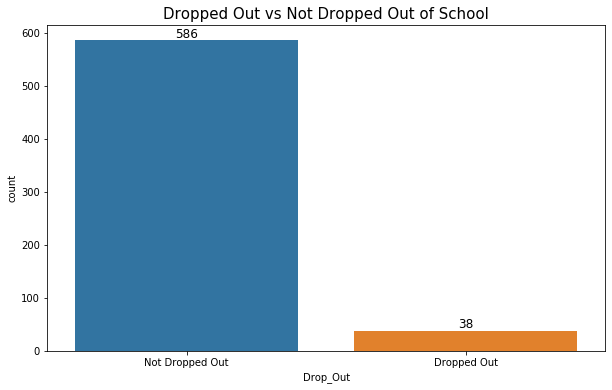

In [146]:
## Plot the status now
plt.figure(figsize = (10, 6))
sns.countplot( x = "Drop_Out", data = df3)

## Get current axis on current figure
ax = plt.gca()

##The maximum scale of y-axis
y_max = df3["Drop_Out"].value_counts().max()

##Iterate through the list of axes "patches"
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() /2., p.get_height(), '%d' % int(p.get_height()),
           fontsize = 12, color = "black", ha = "center", va = "bottom")

## Shows the result here and the size
plt.title("Dropped Out vs Not Dropped Out of School", size = "15")
plt.show()

In [147]:
## There you are !